In [1]:
import GPy
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

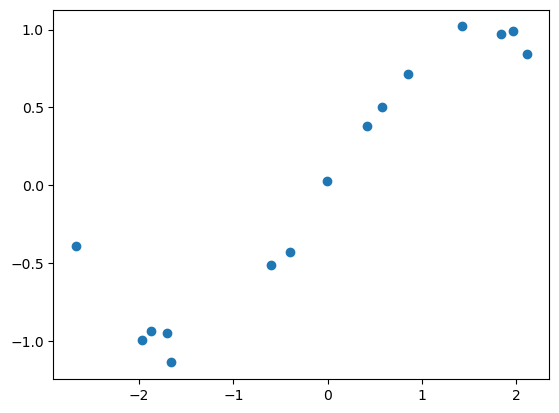

In [2]:
Nsamples = 15
X = np.random.uniform(-3.,3.,(Nsamples,1))
Y = np.sin(X) + np.random.randn(Nsamples,1)*0.05
plt.scatter(X, Y)

### Using GPy
We can use GPy to construct a Gausssian Process Regression model! 

In [3]:
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
model = GPy.models.GPRegression(X,Y,kernel)
display(model)

GP_regression.,value,constraints,priors
rbf.variance,1.0,+ve,
rbf.lengthscale,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


### No optimization

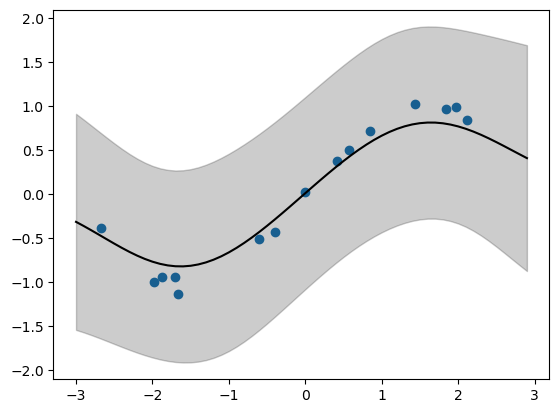

In [4]:
fig, ax = plt.subplots()
ax.scatter(X, Y)

Xtest = np.arange(-3.,3, 0.1).reshape(-1,1)
pmean, pvar = model.predict(Xtest);
pmean = pmean.flatten()
psigma = np.sqrt(pvar).flatten()

ax.fill_between(Xtest.flatten(), pmean - psigma, pmean + psigma, 
                color = "k", alpha = 0.2)
ax.plot(Xtest[:], pmean, c = "k")


### Optimized Solution

Optimization restart 1/5, f = -6.884114928825026
Optimization restart 2/5, f = -6.884114928816883
Optimization restart 3/5, f = -6.884114928822866
Optimization restart 4/5, f = -6.884114928824651
Optimization restart 5/5, f = -6.88411492841551


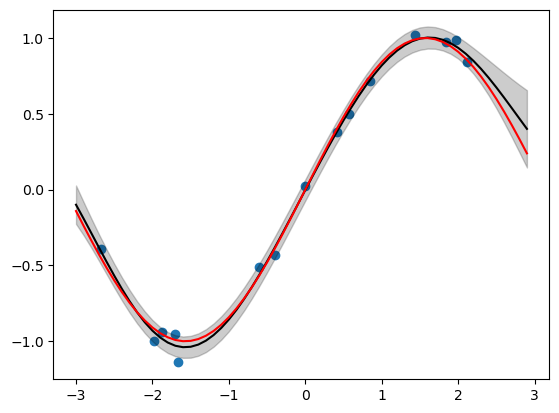

In [7]:
model.optimize(messages=True)
model.optimize_restarts(num_restarts = 5)

fig, ax = plt.subplots()
ax.scatter(X, Y)

Xtest = np.arange(-3.,3, 0.1).reshape(-1,1)
pmean, pvar = model.predict(Xtest);
pmean = pmean.flatten()
psigma = np.sqrt(pvar).flatten()

ax.fill_between(Xtest.flatten(), pmean - psigma, pmean + psigma, 
                color = "k", alpha = 0.2)
ax.plot(Xtest[:], pmean, c = "k")

ax.plot(Xtest[:], np.sin(Xtest[:]), c = "r")



In [8]:
model.rbf.lengthscale #prints the decorrelation lengthscale

index,GP_regression.rbf.lengthscale,constraints,priors
[0],1.41192704,+ve,
